In [1]:
import torch

print("🔍 Checking GPU availability...\n")
print(f"CUDA Available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"GPU Connected: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {round(torch.cuda.get_device_properties(0).total_memory / 1024**3, 2)} GB")
    print(f"CUDA Version: {torch.version.cuda}")
else:
    print("No GPU detected. Using CPU instead.")


🔍 Checking GPU availability...

CUDA Available: True
GPU Connected: NVIDIA GeForce RTX 4060 Laptop GPU
GPU Memory: 8.0 GB
CUDA Version: 11.8


In [2]:
import os
import pandas as pd

base_path = r"F:\ProjCCNS\ccns\5G_Traffic_Datasets"

for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith(".csv"):
            file_path = os.path.join(root, file)

            print("\n" + "="*80)
            print(f"📌 FILE: {file_path}")
            print("="*80)

            try:
                # Load only first 5 rows -> fast + safe
                df = pd.read_csv(file_path, nrows=5)
                print(df.head())
            except Exception as e:
                print(f"❌ Error reading {file_path}: {e}")



📌 FILE: F:\ProjCCNS\ccns\5G_Traffic_Datasets\Game_Streaming\GeForce_Now\GeForce_Now_1.csv
   No.                        Time           Source      Destination Protocol  \
0  436  2022-09-27 13:08:31.564846     10.215.173.1  112.217.128.200      TCP   
1  443  2022-09-27 13:08:31.593193  112.217.128.200     10.215.173.1      TCP   
2  444  2022-09-27 13:08:31.593329     10.215.173.1  112.217.128.200      TCP   
3  445  2022-09-27 13:08:31.594817     10.215.173.1  112.217.128.200  TLSv1.2   
4  446  2022-09-27 13:08:31.594972  112.217.128.200     10.215.173.1      TCP   

   Length                                               Info  
0      60  58632  >  443 [SYN] Seq=0 Win=65535 Len=0 MSS=...  
1      48  443  >  58632 [SYN, ACK] Seq=0 Ack=1 Win=2048 ...  
2      40    58632  >  443 [ACK] Seq=1 Ack=1 Win=79872 Len=0  
3     557                                       Client Hello  
4      40  443  >  58632 [ACK] Seq=1 Ack=518 Win=2096128 ...  

📌 FILE: F:\ProjCCNS\ccns\5G_Traffic_Dataset

In [3]:
import os
import pandas as pd

base_path = r"F:\ProjCCNS\ccns\5G_Traffic_Datasets"
sample_files = {
    "GeForce_Now":      r"Game_Streaming\GeForce_Now\GeForce_Now_1.csv",
    "YouTube_Live":     r"Live_Streaming\YouTube_Live\YouTube_Live_1.csv",
    "Roblox":           r"Metaverse\Roblox\Roblox_1.csv",
    "Battleground":     r"Online_Game\Battleground\Battleground_1.csv",
    "Netflix":          r"Stored_Streaming\Netflix\Netflix_1.csv",
    "Zoom":             r"Video_Conferencing\Zoom\Zoom_1.csv"
}

combined_data = []

for label, relative_path in sample_files.items():
    file_path = os.path.join(base_path, relative_path)

    print(f"📌 Loading: {label}  → {file_path}")

    try:
        df = pd.read_csv(file_path, nrows=600)
        df["Application"] = label
        combined_data.append(df)

    except Exception as e:
        print(f" Error reading {file_path}: {e}")
final_df = pd.concat(combined_data, ignore_index=True)

print("\n Combined Dataset Summary:")
print(final_df["Application"].value_counts())
print(final_df.head())

# Save clean combined dataset
output_path = r"F:\ProjCCNS\ccns\processed_combined_600_per_app.csv"
final_df.to_csv(output_path, index=False)

print(f"\n Saved Combined Dataset To:\n{output_path}")


📌 Loading: GeForce_Now  → F:\ProjCCNS\ccns\5G_Traffic_Datasets\Game_Streaming\GeForce_Now\GeForce_Now_1.csv
📌 Loading: YouTube_Live  → F:\ProjCCNS\ccns\5G_Traffic_Datasets\Live_Streaming\YouTube_Live\YouTube_Live_1.csv
📌 Loading: Roblox  → F:\ProjCCNS\ccns\5G_Traffic_Datasets\Metaverse\Roblox\Roblox_1.csv
📌 Loading: Battleground  → F:\ProjCCNS\ccns\5G_Traffic_Datasets\Online_Game\Battleground\Battleground_1.csv
📌 Loading: Netflix  → F:\ProjCCNS\ccns\5G_Traffic_Datasets\Stored_Streaming\Netflix\Netflix_1.csv
📌 Loading: Zoom  → F:\ProjCCNS\ccns\5G_Traffic_Datasets\Video_Conferencing\Zoom\Zoom_1.csv

✅ Combined Dataset Summary:
Application
GeForce_Now     600
YouTube_Live    600
Roblox          600
Battleground    600
Netflix         600
Zoom            600
Name: count, dtype: int64
   No.                        Time           Source      Destination Protocol  \
0  436  2022-09-27 13:08:31.564846     10.215.173.1  112.217.128.200      TCP   
1  443  2022-09-27 13:08:31.593193  112.217.128

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"F:\ProjCCNS\ccns\processed_combined_600_per_app.csv")
def is_local(ip):
    return ip.startswith("10.215.") or ip == "192.0.0.2"
df["Direction"] = df.apply(lambda row: "uplink" if is_local(row["Source"]) else "downlink", axis=1)
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")
df = df.sort_values(by="Time").reset_index(drop=True)
print(" Direction assigned. Example:")
print(df[["Source","Destination","Direction"]].head())


✅ Direction assigned. Example:
         Source   Destination Direction
0  10.215.173.1  142.251.72.7    uplink
1  10.215.173.1  142.251.72.7    uplink
2  10.215.173.1  142.251.72.7    uplink
3  10.215.173.1  142.251.72.7    uplink
4  10.215.173.1  142.251.72.7    uplink


In [5]:
def extract_micro_windows(df, window_size=50):
    features = []

    for i in range(0, len(df), window_size):
        window = df.iloc[i:i+window_size]
        if len(window) < window_size:
            continue

        feat = {
            "packet_mean": window["Length"].mean(),
            "packet_std": window["Length"].std(),
            "packet_min": window["Length"].min(),
            "packet_max": window["Length"].max(),
            "uplink_ratio": (window["Direction"] == "uplink").mean(),
            "downlink_ratio": (window["Direction"] == "downlink").mean(),
            "tcp_ratio": (window["Protocol"] == "TCP").mean(),
            "udp_ratio": (window["Protocol"] == "UDP").mean(),
            "quic_ratio": (window["Protocol"].str.contains("QUIC", na=False)).mean(),
            "Application": window["Application"].iloc[0]
        }
        features.append(feat)

    return pd.DataFrame(features)

micro_df = extract_micro_windows(df)
print(" Micro-window dataset shape:", micro_df.shape)
micro_df.head()


✅ Micro-window dataset shape: (72, 10)


,packet_mean,packet_std,packet_min,packet_max,uplink_ratio,downlink_ratio,tcp_ratio,udp_ratio,quic_ratio,Application
0,888.18,531.184302,51,1278,0.42,0.58,0.0,0.0,1.0,YouTube_Live
1,855.36,564.033859,56,1278,0.42,0.58,0.0,0.0,1.0,YouTube_Live
2,904.04,556.760563,56,1278,0.38,0.62,0.0,0.0,1.0,YouTube_Live
3,967.18,525.222040,51,1278,0.18,0.82,0.0,0.0,1.0,YouTube_Live
4,1065.60,460.936934,46,1278,0.14,0.86,0.0,0.0,1.0,YouTube_Live


In [6]:
def extract_macro_windows(df, window_seconds=5):
    df = df.set_index("Time")
    resampled = df.resample(f"{window_seconds}S")

    features = resampled["Length"].agg(["count","sum","mean","std","min","max"]).fillna(0)
    features.rename(columns={
        "count": "packet_count",
        "sum": "total_bytes",
        "mean": "avg_packet_size",
        "std": "packet_size_std",
        "min": "min_packet",
        "max": "max_packet"
    }, inplace=True)

    features["uplink_ratio"] = resampled.apply(lambda w: (w["Direction"]=="uplink").mean())
    features["downlink_ratio"] = resampled.apply(lambda w: (w["Direction"]=="downlink").mean())

    features["Application"] = resampled["Application"].first()

    return features.dropna()

macro_df = extract_macro_windows(df)
print("Macro-window dataset shape:", macro_df.shape)
macro_df.head()


C:\Users\Nikhil S\AppData\Local\Temp\ipykernel_39048\2618527753.py:3: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled = df.resample(f"{window_seconds}S")


✅ Macro-window dataset shape: (16, 9)


,packet_count,total_bytes,avg_packet_size,packet_size_std,min_packet,max_packet,uplink_ratio,downlink_ratio,Application
Time,,,,,,,,,
2022-05-30 08:25:15,15,13717,914.466667,441.499534,51.0,1278.0,0.733333,0.266667,YouTube_Live
2022-05-30 08:25:20,561,619430,1104.153298,416.583663,46.0,1278.0,0.142602,0.857398,YouTube_Live
2022-05-30 08:25:25,24,27604,1150.166667,348.749401,118.0,1278.0,0.000000,1.000000,YouTube_Live
2022-05-30 16:01:35,600,326114,543.523333,381.219425,33.0,1324.0,0.743333,0.256667,Zoom
2022-06-17 23:48:30,2,120,60.000000,0.000000,60.0,60.0,1.000000,0.000000,Netflix



✅ Classification Report:

              precision    recall  f1-score   support

Battleground       0.50      1.00      0.67         1
 GeForce_Now       1.00      0.50      0.67         4
     Netflix       1.00      1.00      1.00         3
      Roblox       1.00      1.00      1.00         2
YouTube_Live       1.00      1.00      1.00         5
        Zoom       0.75      1.00      0.86         3

    accuracy                           0.89        18
   macro avg       0.88      0.92      0.87        18
weighted avg       0.93      0.89      0.88        18



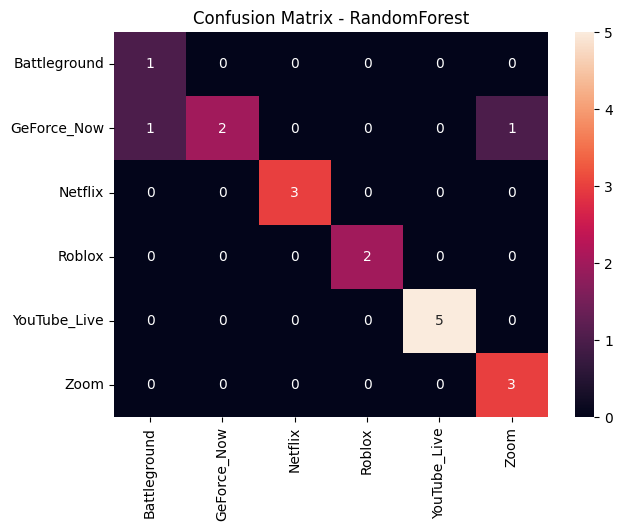

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df_ml = micro_df.dropna().reset_index(drop=True)
X = df_ml.drop("Application", axis=1)
y = df_ml["Application"]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - RandomForest")
plt.show()


In [8]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import numpy as np
df_cv = micro_df.dropna().reset_index(drop=True)

X = df_cv.drop("Application", axis=1)
y = df_cv["Application"]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(rf, X, y, cv=skf, scoring='accuracy')

print("\nCross-Validation Accuracy Scores:")
print(scores)

print(f"\nMean Accuracy: {scores.mean():.4f}")
print(f"Std Deviation: {scores.std():.4f}")

if scores.mean() >= 0.75:
    print("\nModel is learning real encrypted traffic patterns — strong foundation.")
else:
    print("\nModel may be overfitting or features need improvement. We'll handle that next.")



🎯 Cross-Validation Accuracy Scores:
[0.86666667 0.93333333 0.85714286 0.92857143 1.        ]

✅ Mean Accuracy: 0.9171
📉 Std Deviation: 0.0518

🔥 Model is learning real encrypted traffic patterns — strong foundation.


In [9]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
df_seq = df.copy().reset_index(drop=True)

df_seq["dir_flag"] = df_seq["Direction"].map({"uplink": 1, "downlink": 0})
df_seq["is_TCP"]  = (df_seq["Protocol"] == "TCP").astype(int)
df_seq["is_UDP"]  = (df_seq["Protocol"] == "UDP").astype(int)
df_seq["is_QUIC"] = df_seq["Protocol"].str.contains("QUIC", na=False).astype(int)

df_seq["pkt_norm"] = (df_seq["Length"] - df_seq["Length"].mean()) / df_seq["Length"].std()
feature_cols = ["pkt_norm", "dir_flag", "is_TCP", "is_UDP", "is_QUIC"]

window_size = 50
X_seq = []
y_seq = []

stride = 10 

for app in df_seq["Application"].unique():
    sub = df_seq[df_seq["Application"] == app]
    
    for i in range(0, len(sub) - window_size, stride):
        window = sub.iloc[i:i+window_size]
        seq = window[feature_cols].values
        
        if seq.shape == (window_size, len(feature_cols)):
            X_seq.append(seq)
            y_seq.append(app)

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

print("New Sequence Dataset:", X_seq.shape)



✅ New Sequence Dataset: (330, 50, 5)


In [10]:
# Encode app labels → integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_seq)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded
)
print("Train:", X_train.shape, " Test:", X_test.shape)


Train: (247, 50, 5)  Test: (83, 50, 5)


In [11]:
import torch
import torch.nn as nn

class TrafficLSTM(nn.Module):
    def __init__(self, input_dim=5, hidden_dim=64, num_layers=2, num_classes=len(label_encoder.classes_)):
        super(TrafficLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]   
        return self.fc(out)

model = TrafficLSTM().cuda()
print(model)


TrafficLSTM(
  (lstm): LSTM(5, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=6, bias=True)
)


In [12]:
from torch.utils.data import DataLoader, TensorDataset

X_train_t = torch.tensor(X_train, dtype=torch.float32).cuda()
y_train_t = torch.tensor(y_train, dtype=torch.long).cuda()
X_test_t  = torch.tensor(X_test, dtype=torch.float32).cuda()
y_test_t  = torch.tensor(y_test, dtype=torch.long).cuda()

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=32, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 35

for epoch in range(epochs):
    model.train()
    for xb, yb in train_loader:
        optimizer.zero_grad()
        output = model(xb)
        loss = criterion(output, yb)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


Epoch 1/35, Loss: 1.7634
Epoch 2/35, Loss: 1.7195
Epoch 3/35, Loss: 1.5472
Epoch 4/35, Loss: 1.2709
Epoch 5/35, Loss: 1.1943
Epoch 6/35, Loss: 0.9529
Epoch 7/35, Loss: 0.8022
Epoch 8/35, Loss: 0.6618
Epoch 9/35, Loss: 0.4413
Epoch 10/35, Loss: 0.4517
Epoch 11/35, Loss: 0.3087
Epoch 12/35, Loss: 0.4316
Epoch 13/35, Loss: 0.3597
Epoch 14/35, Loss: 0.4255
Epoch 15/35, Loss: 0.3491
Epoch 16/35, Loss: 0.2570
Epoch 17/35, Loss: 0.2091
Epoch 18/35, Loss: 0.1244
Epoch 19/35, Loss: 0.3428
Epoch 20/35, Loss: 0.1576
Epoch 21/35, Loss: 0.2110
Epoch 22/35, Loss: 0.1322
Epoch 23/35, Loss: 0.2291
Epoch 24/35, Loss: 0.0765
Epoch 25/35, Loss: 0.0620
Epoch 26/35, Loss: 0.2333
Epoch 27/35, Loss: 0.1361
Epoch 28/35, Loss: 0.2320
Epoch 29/35, Loss: 0.0721
Epoch 30/35, Loss: 0.0743
Epoch 31/35, Loss: 0.0385
Epoch 32/35, Loss: 0.0294
Epoch 33/35, Loss: 1.5792
Epoch 34/35, Loss: 0.4978
Epoch 35/35, Loss: 0.5509


In [13]:
model.eval()
with torch.no_grad():
    preds = model(X_test_t).argmax(dim=1)
    acc = (preds == y_test_t).float().mean().item()

print(f"\n🎯 LSTM Test Accuracy: {acc*100:.2f}%")



🎯 LSTM Test Accuracy: 90.36%


In [20]:
qos_rules = {
    "Zoom": "low_latency",
    "MS_Teams": "low_latency",
    "Google_Meet": "low_latency",

    "Roblox": "gaming_low_jitter",
    "Battleground": "gaming_low_jitter",

    "GeForce_Now": "high_throughput_reserved",
    "KT_GameBox": "high_throughput_reserved",

    "YouTube_Live": "best_effort",
    "Netflix": "best_effort",
    "Amazon_Prime": "best_effort",
}
def classify_and_enforce(window_sequence):
    model.eval()
    with torch.no_grad():
        seq = torch.tensor(window_sequence, dtype=torch.float32).unsqueeze(0).cuda()
        pred = model(seq).argmax(dim=1).item()
        app = label_encoder.inverse_transform([pred])[0]
        apply_qos_policy(app)
        return app, qos_rules[app]

import os

def simulate_qos(policy):
    if policy == "low_latency":
        print("⚡ Applying LOW LATENCY mode → Prioritizing packets (VoIP/Video Call)")
    elif policy == "gaming_low_jitter":
        print("🎮 Applying GAMING mode → Stabilizing latency & jitter")
    elif policy == "high_throughput_reserved":
        print("🚀 Applying RESERVED THROUGHPUT mode → Guaranteeing bandwidth")
    elif policy == "best_effort":
        print("📺 Applying BEST-EFFORT mode → Normal streaming behavior")
    else:
        print("🔍 Unknown policy — using default")

import torch

def classify_and_apply_qos(window):
    model.eval()
    with torch.no_grad():
        x = torch.tensor(window, dtype=torch.float32).unsqueeze(0).cuda()
        pred = model(x).argmax(dim=1).item()

    app = label_encoder.inverse_transform([pred])[0]
    policy = qos_rules.get(app, "best_effort")

    print(f"\n🔎 Detected Application: **{app}**")
    print(f"🎛 QoS Policy: **{policy}**\n")
    simulate_qos(policy)

test_sample = X_test[0]    # shape: (50,5)
classify_and_apply_qos(test_sample)

import numpy as np

i = np.random.randint(0, len(X_test))
print(f"Testing sample index: {i}")
classify_and_apply_qos(X_test[i])



🔎 Detected Application: **Roblox**
🎛 QoS Policy: **gaming_low_jitter**

🎮 Applying GAMING mode → Stabilizing latency & jitter
Testing sample index: 60

🔎 Detected Application: **Roblox**
🎛 QoS Policy: **gaming_low_jitter**

🎮 Applying GAMING mode → Stabilizing latency & jitter
